The minimum of L1 loss is at (2.7272727272727266, 0.5050505050505052)
The minimum of L2 loss is at (2.929292929292929, 0.30303030303030276)


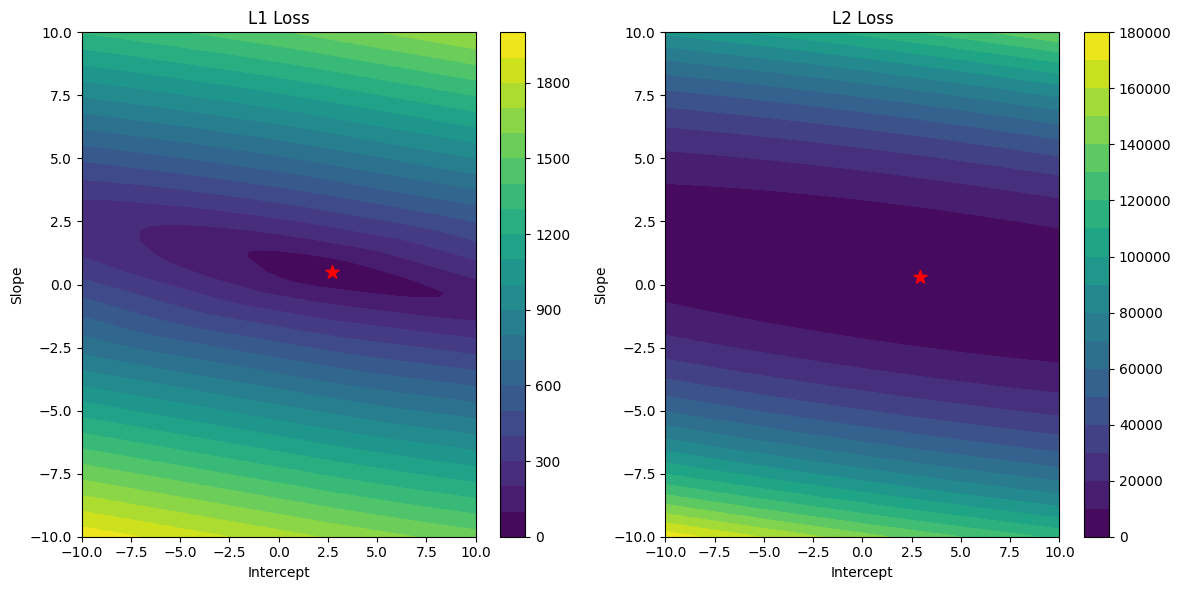

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Dataset
P = np.array([[-4, -0.75],[-3, 0],[-3.1, 1],[-4,0.75],[0.1,1.9],[0.5,2.2],[1,1],[2.5,3],[2.7,5],[2.8,4.5],[3.8,4.8],[4,4],[4.1,5],[4.2,5.1],[4.5,4.8],[4.5,6],[4.6,7],[5,5],[5.1,5.1],[5.2,6],[5.3,6],[6,6],[6.5,7],[7,8.5],[9,8.8],[9.5,9],[9.7,3],[9.8,3.9],[11,5],[19,2]])

x = P[:, 0]
y = P[:, 1]

# Loss functions
def l1_loss(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred))

def l2_loss(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

# Create a grid of parameter values
intercepts = np.linspace(-10, 10, 100)
slopes = np.linspace(-10, 10, 100)
I, S = np.meshgrid(intercepts, slopes)
loss_l1 = np.empty_like(I)
loss_l2 = np.empty_like(I)

# Compute losses for each parameter combination and find minimum points
min_point_l1 = None
min_loss_l1 = float('inf')

min_point_l2 = None
min_loss_l2 = float('inf')

for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        y_pred = I[i, j] + S[i, j] * x
        loss_l1[i, j] = l1_loss(y, y_pred)
        loss_l2[i, j] = l2_loss(y, y_pred)
        
        if loss_l1[i, j] < min_loss_l1:
            min_loss_l1 = loss_l1[i, j]
            min_point_l1 = (I[i, j], S[i, j])
        
        if loss_l2[i, j] < min_loss_l2:
            min_loss_l2 = loss_l2[i, j]
            min_point_l2 = (I[i, j], S[i, j])

# Create contour plots
plt.figure(figsize=(12, 6))

plt.subplot(121)
contour_l1 = plt.contourf(I, S, loss_l1, levels=20, cmap='viridis')
plt.colorbar(contour_l1)
plt.scatter(min_point_l1[0], min_point_l1[1], color='red', marker='*', s=100)
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.title('L1 Loss')
print('The minimum of L1 loss is at', min_point_l1)

plt.subplot(122)
contour_l2 = plt.contourf(I, S, loss_l2, levels=20, cmap='viridis')
plt.colorbar(contour_l2)
plt.scatter(min_point_l2[0], min_point_l2[1], color='red', marker='*', s=100)
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.title('L2 Loss')
print('The minimum of L2 loss is at', min_point_l2)

plt.tight_layout()
plt.show()
